In [236]:
import numpy as np
import matplotlib.pyplot as plt

### Creating Arrays

In [237]:
a1 = np.array([2, 3, 5, 6])
a2 = np.zeros(10)
a3 = np.ones(10)
a4 = np.random.random(10)
a5 = np.random.rand(10) # gaussian distribution
a6 = np.linspace(0, 10, 100)
a7 = np.arange(0, 10, 0.02)

### Array Operations

In [238]:
2*a1
1/a4

array([1.89564627, 2.04993915, 1.4922534 , 6.33838973, 1.01466728,
       1.86254388, 2.93066151, 1.87752694, 2.46921212, 2.70276893])

boolean operations

In [239]:
a1 > 4 ##Imp##

array([False, False,  True,  True])

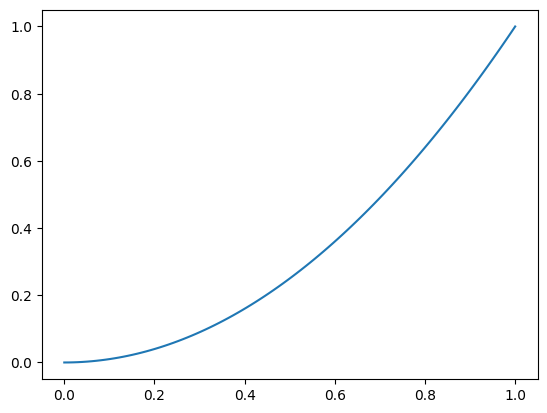

In [240]:
x = np.linspace(0, 1, 100)
plt.plot(x, x**2)

(array([1., 0., 3., 1., 3., 0., 1., 0., 0., 1.]),
 array([0.15776878, 0.24054637, 0.32332397, 0.40610157, 0.48887916,
        0.57165676, 0.65443435, 0.73721195, 0.81998954, 0.90276714,
        0.98554474]),
 <BarContainer object of 10 artists>)

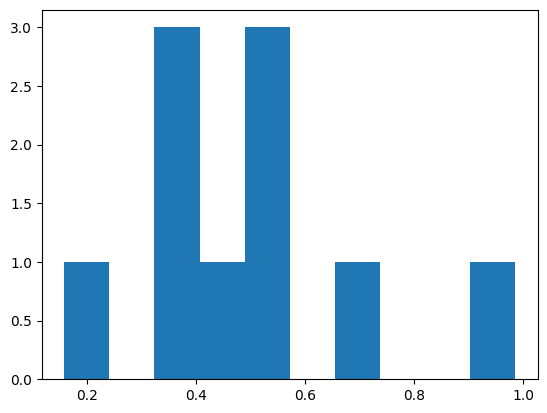

In [241]:
plt.hist(a4)

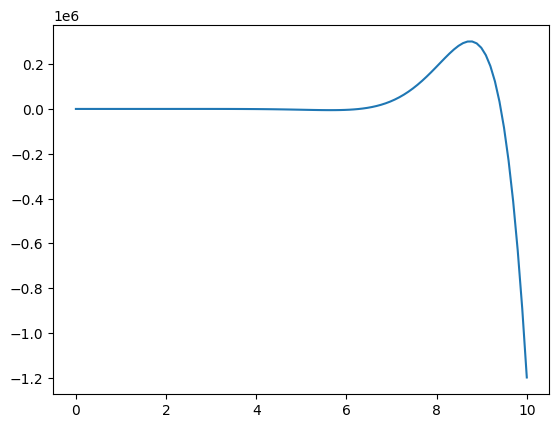

In [242]:
def f(x):
    return x**2 * np.sin(x)/np.exp(-x)

x = np.linspace(0, 10, 100)
y = f(x)
plt.plot(x, y)

#### Lot more functions are possible

### Array Indexing/Slicing

In [243]:
a1 = np.array([2, 4, 6, 8, 10])
a1[2]

6

In [244]:
a1[2:]

array([ 6,  8, 10])

In [245]:
a1[:-2]
a1[1:-2]

array([4, 6])

In [246]:
a1>3

array([False,  True,  True,  True,  True])

In [247]:
a1[a1>3]

array([ 4,  6,  8, 10])

In [248]:
names = np.array(['Jim', 'Luke', 'Josh', 'Pete'])
first_letter_j = np.vectorize(lambda s: s[0])(names)=='J'
names[first_letter_j]

array(['Jim', 'Josh'], dtype='<U4')

### Calculus/Statistics

In [249]:
a1 = 2*np.random.randn(10000) + 10

In [250]:
np.mean(a1)

9.986870550107867

In [251]:
np.std(a1)

2.000678127875453

In [252]:
np.percentile(a1, 80) #80 percentile in a1 from the given number

11.672725574484863

Integrals and derivatives

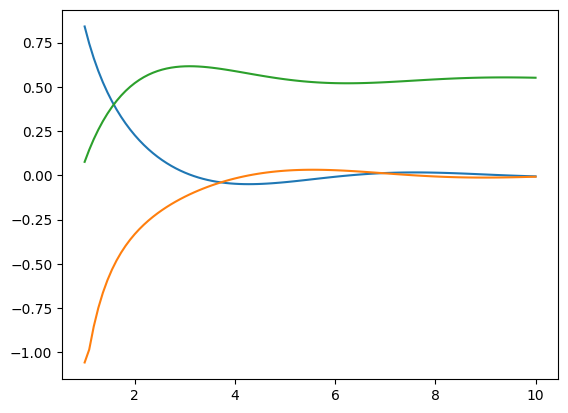

In [253]:
x = np.linspace(1, 10, 100)
y = 1/x**2 * np.sin(x)
plt.plot(x, y)

dydx = np.gradient(y, x)
plt.plot(x, dydx)

intdx = np.cumsum(y)*(x[1]-x[0])
plt.plot(x, intdx)

## Examples

### Question 1:

Let $y = e^{\frac{-x}{10}}sin(x)$ Consider 10000 intervals in the range [0, 10]

1) Plot the function $y$ $vs$ $x$ in the range [0, 10]

2) Compute the mean and standard deviation of $y$ for $x$ values in [4, 7]

3) For x in the range [4, 7] Find the value ${y_m}$ such that 80% of $y$ values are less than ${y_m}$ 

4) Plot $\frac{dy}{dx}$ vs $x$
    
5) Find the locations where $\frac{dy}{dx} = 0$

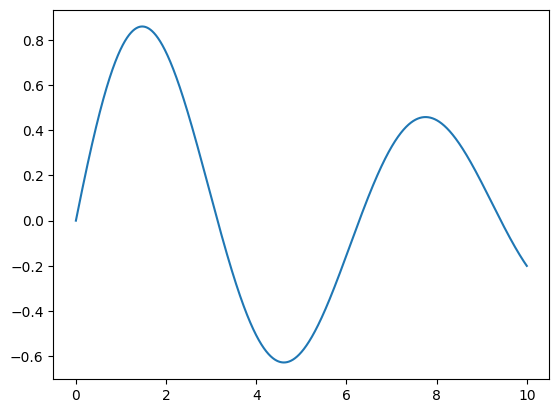

In [254]:
x = np.linspace(0, 10, 10000)
y = np.exp(-x/10) * np.sin(x)
plt.plot(x, y)

In [255]:
np.mean(y[(x>=4)*(x<=7)])

-0.2956362863932012

In [256]:
def new_func():
    return y[(x>=4)*(x<=7)]

np.std(new_func())

0.3144532369395424

In [257]:
y_m = np.percentile(y[(x>=4)*(x<=7)], 80)
y_m

0.061372680560897265

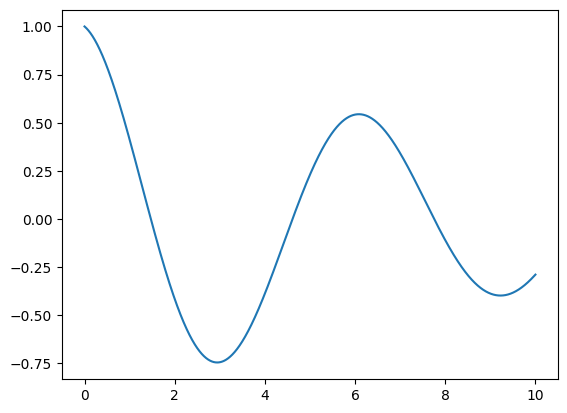

In [258]:
dydx = np.gradient(y, x)
plt.plot(x, dydx)

In [259]:
dydx = np.gradient(y, x)
x[1:][dydx[1:] * dydx[:-1] < 0]

array([1.47114711, 4.61346135, 7.75477548])

### Question 2:

Sum together every number from 0 to 10,000 except for those which can divide by 4 or 7. Do this in one line on code

In [260]:
np.arange(0, 10001, 1)[(np.arange(0,10001,1)%4!=0)*(np.arange(0,10001,1)%7!=0)].sum()

32147142

### Question 3:

Consider the flower petal ${r(\theta) = 1 + \frac{3}{4}   sin(3\theta)}$  for 0 ${\le \theta \le 2\pi}$

1) Make the plot of the flower (find x and y points)

2) Compute the area using the caluclus formula ${A = \int\limits_0^{2\pi} \frac{1}{2}r^2 d{\theta} }$

3) Compute the arclength using the calculus formula ${L = \int\limits_0^{2\pi} \sqrt{r^2 + (\frac{dr}{d\theta})^2}d\theta}$

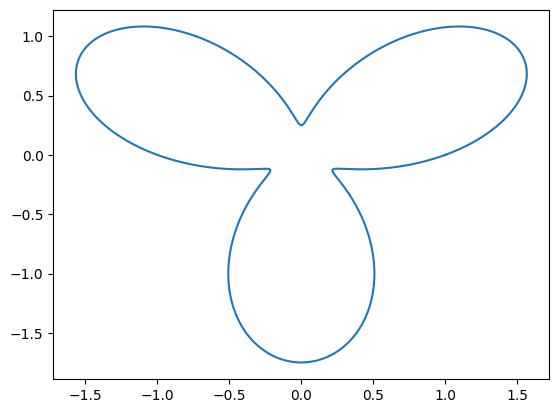

In [261]:
theta = np.linspace(0, 2*np.pi, 10000)
r = (1 + ((3/4)* np.sin(3*theta)))
x = r*np.cos(theta)
y = r*np.sin(theta)
plt.plot(x, y)

In [262]:
y = (1/2)*(r**2)
np.sum(y)*(theta[1]-theta[0])

4.02547977809635

In [263]:
drdtheta = np.gradient(r, theta)
y = np.sqrt((r**2) + (drdtheta**2))
np.sum(y)*(theta[1]-theta[0])

11.626531213518826

### Question 4:

The power emitted by a blackbody is $P = A\sigma\epsilon T^4$. After measuring the temperature of a start you find that $T(t) = T_0{\frac{1}{1+e^{-kt}}}$. Plot the total energy emitted by the start as a function of time using the fact 

$E(t) = \int\limits_{t'=0}^{t'=t} P(t') dt'$

(For simplicity consider all universal constants to be 1)

In [264]:
t = np.linspace(0, 3, 100)
P = (1 / (1 + np.exp(-t)))**4
E = np.cumsum(P) * (t[1]-t[0])

Text(0, 0.5, '$\\left(\\frac{k}{A \\sigma \\epsilon T_0^4}\\right) E(t)$')

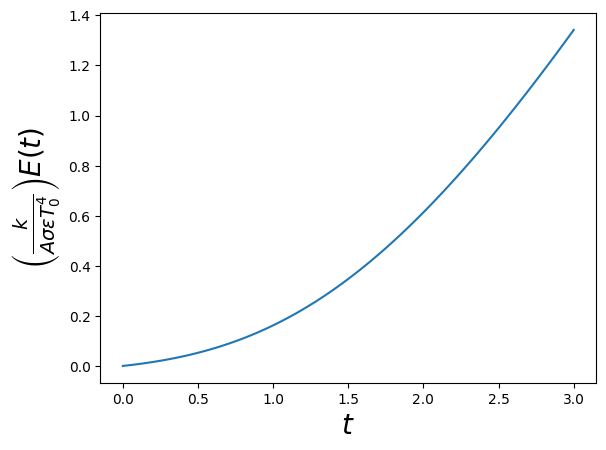

In [265]:
plt.plot(t, E)
plt.xlabel("$t$", fontsize=20)
plt.ylabel(r'$\left(\frac{k}{A \sigma \epsilon T_0^4}\right) E(t)$', fontsize = 20)

## Multi-Dimensional Array

Creating multi dimensional arrays

In [266]:
a1 = np.array([[4, 6, 2], [4, 5, 6], [4, 2, 1]])
a1

array([[4, 6, 2],
       [4, 5, 6],
       [4, 2, 1]])

Turen n dimensional array into 1d using ravel() method

In [267]:
a1.ravel()

array([4, 6, 2, 4, 5, 6, 4, 2, 1])

Element indexing

In [268]:
a1[0] # first row

array([4, 6, 2])

In [269]:
a1[:,0] # first column

array([4, 4, 4])

In [270]:
a1[1:, :2]

array([[4, 5],
       [4, 2]])

## Dealing with 2D functions

Function in 2 dimensions

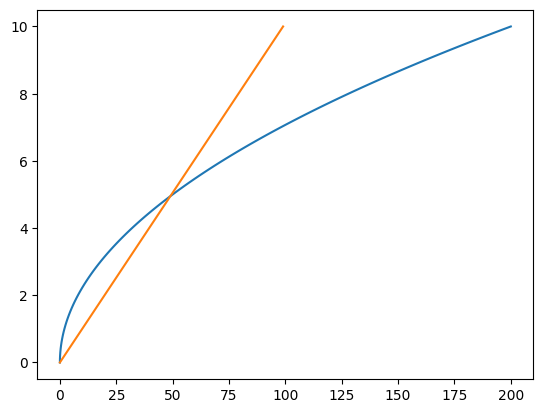

In [271]:
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100) # need to be the same length

z = x**2 + y**2
plt.plot(z, x, y) # it gives us a function like 2*x**2 not a circle!
# hence we use a meshgrid

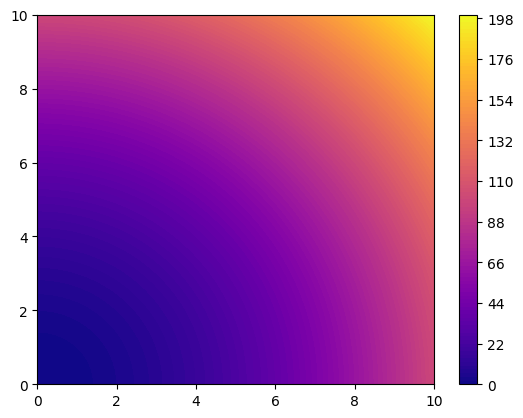

In [272]:
import cmath


xv, yv = np.meshgrid(x, y)
zv = xv**2 + yv**2

plt.contourf(xv, yv, zv, levels=100, cmap="plasma")
plt.colorbar()

# Examples

### Question 1

Let $f(x, y) = e^{-(x^2+y^2)}.sin(x)$ for $-2 \le x \le 2$ and $-2 \le y \le 2$
1) Make a contour plot of $f$
2) Find the volume $|f(x, y)|$ in the specified x and y range
3) Find the volume $|f(x, y)|$ only in the region where $\sqrt{x^2+y^2}$ > $0.5$

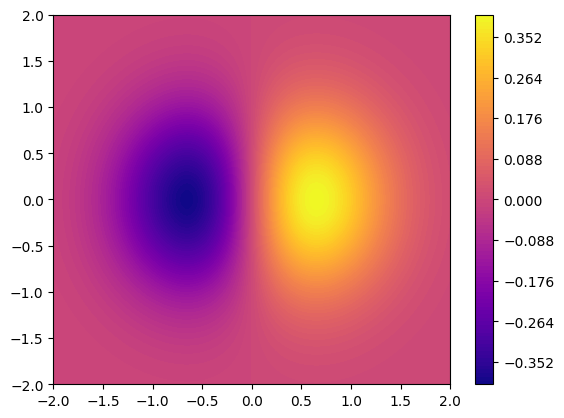

In [273]:
#1
x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)
xv, yv = np.meshgrid(x, y)
f = np.exp(-xv**2 -  yv**2) * np.sin(xv)
plt.contourf(xv, yv, f, levels=100, cmap="plasma")
plt.colorbar()

In [274]:
#2
sum(np.abs(f.ravel())) * np.diff(x)[0] * np.diff(y)[0]


1.4861858145125453

In [275]:
#3
sum(np.abs(f[xv**2+yv**2 > 0.25].ravel())) * np.diff(x)[0] * np.diff(y)[0]

1.344765293020408

### Question 2

After examination a circuit full of resistors, you find that the voltage at 4 specified points is given by

$3V_1 + 2V_2 + 3V_3 + 10V_4 = 4$

$2V_1 - 2V_2 + 5V_3 + 8V_4 = 1$

$3V_1 + 3V_2 + 4V_3 + 9V_4 = 3$

$3V_1 + 4V_2 - 3V_3 - 7V_4 = 2$

Find all the voltages

In [276]:
coeff = np.array([[3, 2, 3, 10], [2, -2, 5, 8], [3, 3, 4, 9], [3, 4, -3, -7]])
rhs = np.array([4, 1, 3, 2])
ans = np.linalg.solve(coeff, rhs)
ans

array([ 0.78378378,  0.03603604, -0.67567568,  0.36036036])

### Question 3:

An electric field is given by $\vec{E}(z, t) = E_0cos(z-t)\hat{x} + 2E_0cos(z-t+\pi /2)\hat{y}$
1. Find the magnetic field for all $z \in [0, 4\pi]$ and $t \in [0, 10]$ using <br> $c\vec{B}(z, t) = \hat{z} \times \vec{E}(z, t)$
2. Compute the Poynting vector $\vec{S} = \vec{E} \times \vec{B} \space \forall \space z, t$

In [277]:
#1
t = np.linspace(0, 10, 100)
z = np.linspace(0, 4*np.pi, 100)

tv, zv = np.meshgrid(t, z)

Ex = np.cos(zv - tv)
Ey = 2*np.sin(zv-tv + np.pi/2)
Ez = 0*zv

In [280]:
#2
E = np.array([Ex, Ey, Ez])
E = np.swapaxes(E, 0, -1)
B = np.cross(np.array([0,0,1]), E)
E = np.swapaxes(E, 0, -1)
B = np.swapaxes(B, 0, -1)


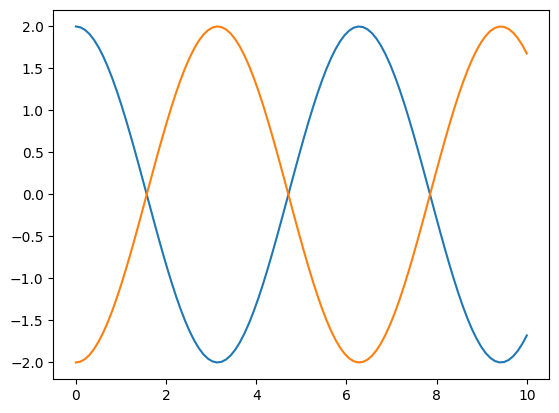

In [281]:
Bx, By, Bz = B
plt.plot(t, Ey[0])
plt.plot(t, Bx[0])

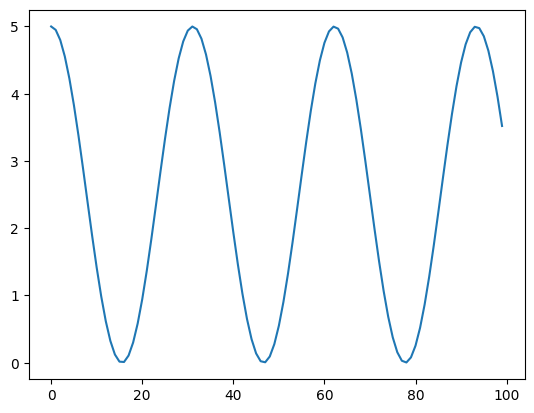

In [282]:
S = np.cross(np.swapaxes(E, 0, -1), np.swapaxes(B, 0, -1))
S = np.swapaxes(S, 0, -1)
Sx, Sy, Sz = S
plt.plot(Sz[0])

### Question 4

Find the solutions to $(\frac{d^2}{dx^2} + (10x)^2)f = \lambda f$ with boundry conditions <br>$f(0) = f(1) =  0$
1. use the eigenvalue method and the fact that $\frac{d^2f}{dx^2} \thickapprox \frac{f_{i+1}+f_{i-1}-2f_i}{\Delta x^2}$ where <br> $f_i = f(i\Delta x)$ and $i$ is an integer

In [ ]:
#no idea